## Creating a GIF for PRISM files:

* utilized code from past projects, and online sources. 

In [36]:
import imageio
import os
from os import path
from PIL import Image
from pathlib import Path
import glob
import gdal

import rasterio
from matplotlib import pyplot
import numpy as np

### My first inspection of the Images doesn't display the precipitaion values' variation within the US 
I figured that the no data values (-9999) were causing too much contrast between the "No data" values and the actual precipitation values within the US (resulting in an outline of the continental US). Please see examples of the original tif files below. 

So, I used code to change the -9999 values to a less extreme value, -100, in order to showcase value variation for precipitation more easily in the GIF. Please see code below. 


### using rasterio to open a tif file

(621, 1405)


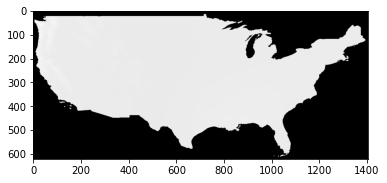

In [160]:
#TIF File!!! (converted from the bil file within a different python Notebook)
#opening and reding the tif file into memory
src = rasterio.open("PRISM_ppt_30yr_normal_4kmM2_01_bil.tif")
array_tif = src.read(1)

# need the raster shape when i edit the raster values later...
print(array_tif.shape) 

#Notice how little variation there is in this ploted image
pyplot.imshow(array_tif, cmap='gray')
pyplot.show() 

(621, 1405)


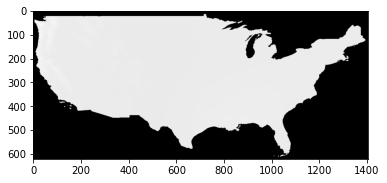

In [161]:
#compare the tif to the bil versions of the same file
#BIL!!
bil = rasterio.open("bil_files/PRISM_ppt_30yr_normal_4kmM2_01_bil.bil")
array_bil = bil.read(1)

#same shape (heigh/width dimensions)
print(array_bil.shape)

#Notice how little variation there is in this ploted image
pyplot.imshow(array_bil, cmap='gray')
pyplot.show() 

In [162]:
#looking at min and max of my bil and tif files

#this code was sourced from my Geocomputing lab
def raster_stats_np(raster):
    import numpy as np
    minimum = np.min(raster)
    maximum = np.max(raster)
    average = np.mean(raster)
    #necessary to make sure my raster is an array. 
    raster = np.array(raster)
    minind = np.unravel_index(np.argmin(raster), raster.shape)
    maxind = np.unravel_index(np.argmax(raster), raster.shape)
    print("minimum:", minimum, "\nmaximum:", maximum, "\naverage:", average) 
    print("\nminimum value index:", minind)
    print("maximum value index:", maxind)
    
raster_stats_np(array_tif)
raster_stats_np(array_bil)

#notice here the -9999 values are impacting my visual displays

minimum: -9999.0 
maximum: 911.53 
average: -4447.357

minimum value index: (0, 0)
maximum value index: (51, 31)
minimum: -9999.0 
maximum: 911.53 
average: -4447.357

minimum value index: (0, 0)
maximum value index: (51, 31)


### Changing raster cell values
* The min -9999 is too extreme (doesn't allow for me to map the more subtle values for the percipitation values) , and thus need to be replaced with a less extreme value: -100

In [140]:
# reading in each month's tif file to change the -9999 values:
List_of_tifs = ["PRISM_ppt_30yr_normal_4kmM2_01_bil.tif",
               "PRISM_ppt_30yr_normal_4kmM2_02_bil.tif",
               "PRISM_ppt_30yr_normal_4kmM2_03_bil.tif",
               "PRISM_ppt_30yr_normal_4kmM2_04_bil.tif",
               "PRISM_ppt_30yr_normal_4kmM2_05_bil.tif",
               "PRISM_ppt_30yr_normal_4kmM2_06_bil.tif",
               "PRISM_ppt_30yr_normal_4kmM2_07_bil.tif",
               "PRISM_ppt_30yr_normal_4kmM2_08_bil.tif",
               "PRISM_ppt_30yr_normal_4kmM2_09_bil.tif",
               "PRISM_ppt_30yr_normal_4kmM2_10_bil.tif",
               "PRISM_ppt_30yr_normal_4kmM2_11_bil.tif",
                "PRISM_ppt_30yr_normal_4kmM2_12_bil.tif"]

#need to read each file into my memory (next step is altering each tif to remove extreme -9999 value)
#could try to use a for loop to reduce repeating code....
array_tif_01_x=rasterio.open(List_of_tifs[0])
array_tif_01= array_tif_01_x.read(1)

array_tif_02_x=rasterio.open(List_of_tifs[1])
array_tif_02= array_tif_02_x.read(1)

array_tif_03_x=rasterio.open(List_of_tifs[2])
array_tif_03= array_tif_03_x.read(1)

array_tif_04_x=rasterio.open(List_of_tifs[3])
array_tif_04= array_tif_04_x.read(1)

array_tif_05_x=rasterio.open(List_of_tifs[4])
array_tif_05= array_tif_05_x.read(1)

array_tif_06_x=rasterio.open(List_of_tifs[5])
array_tif_06= array_tif_06_x.read(1)

array_tif_07_x=rasterio.open(List_of_tifs[6])
array_tif_07= array_tif_07_x.read(1)

array_tif_08_x=rasterio.open(List_of_tifs[7])
array_tif_08=array_tif_08_x.read(1)

array_tif_09_x=rasterio.open(List_of_tifs[8])
array_tif_09= array_tif_09_x.read(1)

array_tif_10_x=rasterio.open(List_of_tifs[9])
array_tif_10= array_tif_10_x.read(1)

array_tif_11_x=rasterio.open(List_of_tifs[10])
array_tif_11= array_tif_11_x.read(1)

array_tif_12_x=rasterio.open(List_of_tifs[11])
array_tif_12= array_tif_12_x.read(1)


In [152]:
#borrowed a function from a past Geocomputing assignment, can replace cell values with new values

# the cell was run 12 different times (once for each file)--could easily try to make a forloop to automate such a task
def transfrom(inputraster):
    OutPutList = []
    for row in inputraster:
        for pixel in row:
            if pixel == -9999.0:
                pixel = -100
                OutPutList.append(pixel)
            else:
                OutPutList.append(pixel)
  #need to reshape my list to the prior dimensions in the FW_cropped array
    OutPutArray = np.reshape(OutPutList, (621, 1405)) #found dimensions previously
    return OutPutArray

NewRaster = transfrom(array_tif_01) #use this out put within'export_new_tif()' function

#exports the changes i made to teh original tif with a chosen filename
def export_new_tif(output_from_transform, out_filename):
    #exporting array as a tif file, 
    File_data = gdal.Open('PRISM_ppt_30yr_normal_4kmM2_01_bil.tif', 1)
    
    #Array to tif:
    dst_filename = out_filename # this file is renamed every time this cell is run
    x_pixels = 1405  # number of pixels in x
    y_pixels = 621  # number of pixels in y
    driver = gdal.GetDriverByName('GTiff')
    dataset = driver.Create(dst_filename,x_pixels, y_pixels, 1,gdal.GDT_Float32)
    dataset.GetRasterBand(1).WriteArray(NewRaster)

    # following code is adding GeoTransform and Projection
    geotrans=File_data.GetGeoTransform()  #get GeoTransform from existed 'data'
    proj=File_data.GetProjection() #you can get from a existing tif or import 
    dataset.SetGeoTransform(geotrans)
    dataset.SetProjection(proj)
    dataset.FlushCache()
    dataset=None
    
export_new_tif(NewRaster, 'Prism_01.tif') #change name for file as desired


# sources:
# - https://stackoverflow.com/questions/37648439/simplest-way-to-save-array-into-raster-file-in-python

## A visual inspection of my newly altered PRISM data

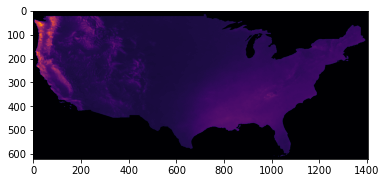

In [153]:
#a quick visual inspection- make sure output makes sense
src = rasterio.open("Prism_01.tif")
array_tif_x1 = src.read(1)
array_tif_x1.shape

pyplot.imshow(array_tif_x1, cmap='inferno')
pyplot.show()

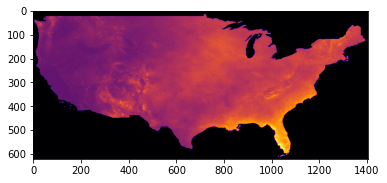

In [156]:
#a quick visual inspection- make sure output makes sense
src = rasterio.open("Prism_08.tif")
array_tif_x8 = src.read(1)
array_tif_x8.shape

pyplot.imshow(array_tif_x8, cmap='inferno')
pyplot.show()

## Making the GIF

In [163]:
# Create a GIF and export to working directory
imageList =[]
for name in glob.glob('Prism_*'):
 #appending already created images from my directory to the same list
    imageList.append(imageio.imread(name))
imageio.mimwrite('GifMap_12.gif', imageList, fps=0.9)

#establishing working directory
workDir = os.path.join(os.path.expanduser ('~'), 'ArcGIS_labs/') # change file path here to 
if not os.path.exists(workDir):
    os.makedirs(workDir)

textedGif = os.path.join(workDir, 'GifMap_12.gif')

#adding text and resending the newly texted gif to working directory
geemap.add_text_to_gif(textedGif, textedGif, text_sequence = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September','October','November','December'], font_size = 80, font_color = '#ffffff', add_progress_bar = True)
label = "Monthly Precipitations from 1980 to 2010"
geemap.add_text_to_gif(textedGif, textedGif, xy = ('15%', '88%'), text_sequence = label, font_size = 50, font_color = '#ffffff', add_progress_bar = False, duration = 999)

geemap.show_image('GifMap_12.gif')

Lossy conversion from float32 to uint8. Range [-100.0, 665.0900268554688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-100.0, 260.67999267578125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-100.0, 264.1300048828125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-100.0, 573.3400268554688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-100.0, 911.530029296875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-100.0, 499.8900146484375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-100.0, 272.05999755859375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion fr

Output()